In [2]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np

In [3]:
data_tumor = "BRCA_Primary_Tumor.chr19.tsv"
data_normal = "BRCA_Solid_Tissue_Normal.chr19.tsv"

In [4]:
# read data
tumor = pd.read_csv(data_tumor, delimiter="\t")
tumor = tumor.reset_index().rename(columns={"index":"location"})
tumor

,location,Unnamed: 0,6005486021_R01C01,6005486021_R02C01,6005486021_R03C01,6005486021_R04C01,6005486021_R05C01,6005486021_R06C01,6005486021_R01C02,6005486021_R02C02,...,6285633072_R02C02,6285633072_R04C02,6285633072_R03C02,6285633072_R05C02,7786923102_R06C02,7796806109_R01C01,7796806109_R05C01,7796806109_R06C01,7796806109_R04C01,7796806109_R02C01
0,0,cg15886596,10,10,7,7,7,7,8,6,...,13,14,11,12,13,13,12,11,12,12
1,1,cg12261117,61,44,40,30,39,30,37,38,...,45,50,41,41,74,71,72,52,63,48
2,2,cg18110419,442,617,652,689,658,636,607,514,...,665,565,608,596,701,488,625,639,701,508
3,3,cg25433760,521,976,960,979,950,971,977,969,...,965,964,953,958,962,973,976,978,973,974
4,4,cg23278040,162,486,760,224,818,561,549,715,...,462,207,54,270,366,384,788,434,592,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,66,702,683,724,654,677,580,648,...,396,848,370,444,491,424,324,594,446,288
24667,24667,cg03567148,962,990,974,969,991,978,981,979,...,946,934,926,950,973,911,928,957,955,952
24668,24668,cg13678479,959,964,972,972,970,966,959,969,...,967,954,920,968,948,941,939,955,943,950
24669,24669,cg05617300,990,988,990,987,988,988,989,988,...,982,986,985,984,980,985,984,987,983,980


In [5]:
tumor_patients = tumor.columns[2:]

In [6]:
normal = pd.read_csv(data_normal, delimiter="\t")
normal = normal.reset_index().rename(columns={"index":"location"})
normal

,location,Unnamed: 0,6005486025_R04C01,6005486025_R02C01,6005486025_R03C01,6005486025_R01C01,6005486025_R06C01,6005486011_R03C01,6005486011_R04C01,6005486011_R01C02,...,6042324006_R05C02,6057833134_R03C02,6057833134_R04C02,6057833159_R05C02,6057833166_R01C01,6057833166_R03C01,6285633051_R02C01,6057833155_R06C02,6057833101_R02C01,6057833101_R06C02
0,0,cg15886596,10,8,9,9,9,7,7,8,...,8,10,12,11,12,11,9,11,10,10
1,1,cg12261117,56,38,39,59,48,37,43,46,...,72,57,67,62,67,61,40,80,65,61
2,2,cg18110419,731,665,662,698,672,734,702,661,...,928,653,710,686,640,627,767,733,684,668
3,3,cg25433760,949,958,951,964,958,971,965,970,...,899,943,959,958,932,954,974,940,941,971
4,4,cg23278040,309,267,778,625,452,600,636,598,...,449,286,512,562,558,367,692,295,288,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24666,24666,cg23652859,91,58,190,303,74,221,283,472,...,127,100,234,195,168,315,255,104,241,377
24667,24667,cg03567148,915,862,938,971,898,968,970,947,...,752,814,892,868,908,892,951,805,827,956
24668,24668,cg13678479,973,948,966,964,978,969,993,973,...,938,946,952,957,947,954,971,948,960,953
24669,24669,cg05617300,984,988,984,986,988,991,991,990,...,978,976,978,984,979,976,987,980,980,981


In [7]:
normal_patients = normal.columns[2:]

# plot of percentage

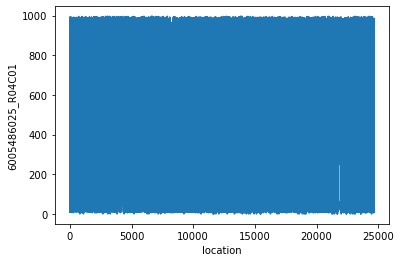

In [30]:
sns.lineplot(data=normal,x="location", y="6005486025_R04C01")

# distribution of percentages

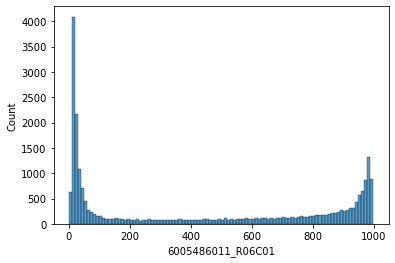

In [31]:
sns.histplot(normal.iloc[:,10], bins=100)

# plot moving average

In [143]:
def min_max_norm(x):
    return (x-x.min())/(x.max()-x.min())

def add_moving_avg_features(df, features, sample_size, window_length):
    sampled_patients = pd.Series(features).sample(sample_size)
    df["std"] = df.loc[:,sampled_patients].std(axis=1)
    df["mean"] = df.loc[:,sampled_patients].mean(axis=1)
    #df["SMA_std"] = df["std"].rolling(window_length).std()
    df["SMA_mean"] = df["mean"].rolling(window_length).mean()
    #df["SMA_std_norm"] = min_max_norm(df["SMA_std"])
    #df["SMA_median_norm"] = min_max_norm(df["SMA_median"])
    return df


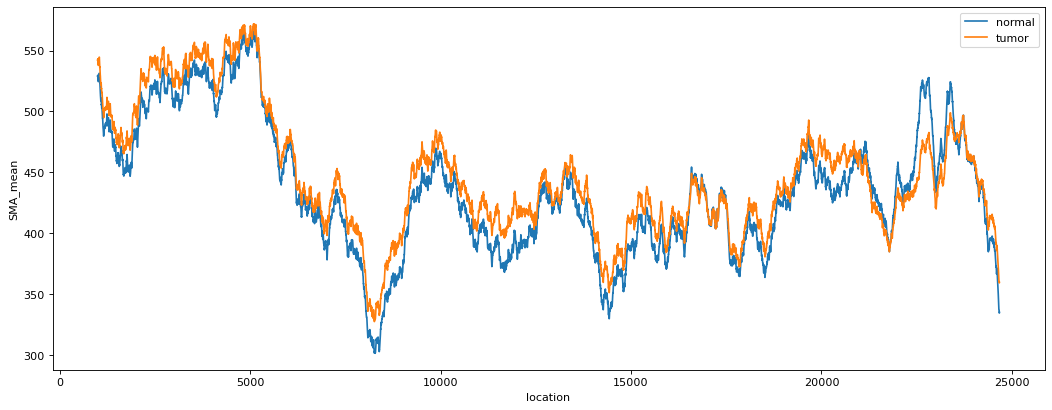

In [213]:
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)

normal = add_moving_avg_features(normal, normal_patients, 90, 1000)
tumor = add_moving_avg_features(tumor, tumor_patients, 90, 1000)


sns.lineplot(data=normal, x="location", y="SMA_mean", label="normal")
sns.lineplot(data=tumor, x="location", y="SMA_mean", label="tumor")

# simulate 10,000 iterations

In [72]:
WINDOW_LENGTH = 50
normal_new = add_moving_avg_features(normal, normal_patients, 3, WINDOW_LENGTH)
tumor_new = add_moving_avg_features(tumor, tumor_patients, 3, WINDOW_LENGTH)
difference = (normal["SMA_mean"] - tumor["SMA_mean"])**2

n = 1000
for i in tqdm(range(n)):
    normal_new = add_moving_avg_features(normal, normal_patients, 5, WINDOW_LENGTH)
    tumor_new = add_moving_avg_features(tumor, tumor_patients, 5, WINDOW_LENGTH)
    new_difference = (normal_new["SMA_mean"] - tumor_new["SMA_mean"])**2
    difference = difference + new_difference
difference

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 147.88it/s]


0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
             ...      
24666    549460.985724
24667    584544.315047
24668    581077.587084
24669    579168.228284
24670    575715.009360
Name: SMA_mean, Length: 24671, dtype: float64

In [73]:
squre_diff = difference.to_frame("avg_difference").reset_index().drop(columns="index").reset_index()
squre_diff["avg_difference"] = squre_diff["avg_difference"]/(n+1)
#sns.lineplot(data=normal, x="location", y="SMA_median_norm")

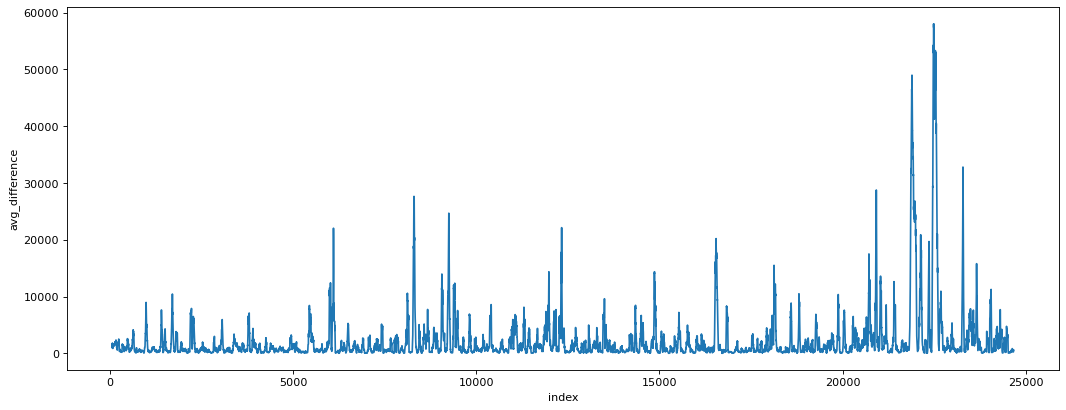

In [74]:
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
sns.lineplot(data=squre_diff, x="index", y="avg_difference")

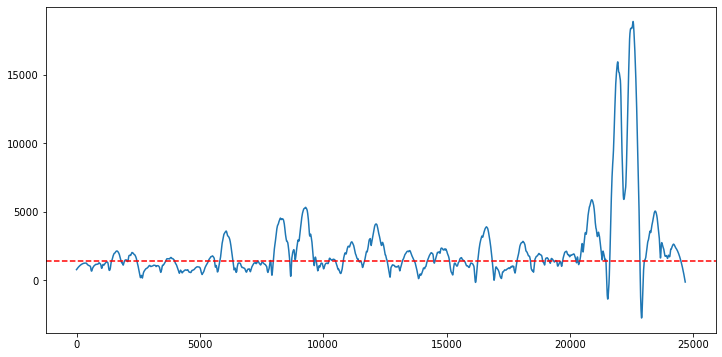

In [75]:
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))
squre_diff["avg_difference_smooth"] = savgol_filter(squre_diff["avg_difference"].fillna(0), 801, 2)
squre_diff["avg_difference_smooth"].plot()
ax.axhline(1400, color="red", linestyle="--")

In [ ]:
info = pd.read_csv("Illumina_450k.txt", delimiter="\t")
info

In [ ]:
info[info["chrCHR"] == "chr19"]

In [ ]:
genes = []
ls = info[info["chrCHR"] == "chr19"]["UCSC_RefGene_Name"].to_list()
for concated in ls:
    if concated is not np.nan:
        splited = concated.split(";")
        for item in splited:
            genes.append(item)

In [ ]:
set(genes)

In [ ]:
len(set(genes))

In [214]:
normal_T = normal[normal_patients].T
normal_T["label"] = 0
tumor_T = tumor[tumor_patients].T.sample(97)
tumor_T["label"] = 1
concated = pd.concat([normal_T, tumor_T])

In [217]:
concated["label"]

6005486025_R04C01    0
6005486025_R02C01    0
6005486025_R03C01    0
6005486025_R01C01    0
6005486025_R06C01    0
                    ..
9283265014_R04C02    1
6026818055_R02C02    1
6057833159_R02C02    1
6042324005_R06C01    1
6042324005_R06C02    1
Name: label, Length: 194, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [219]:
y = concated["label"]
X = concated.drop(columns=["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42,
                                              stratify=y)

In [221]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# XGboost baseline

In [224]:

xg_simple = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=1, objective='binary:logistic')
xg_simple.fit(X_train, y_train)
y_pred = xg_simple.predict(X_test)

In [225]:
print(f"The accuracy is:{accuracy_score(y_pred, y_test)}, recall:{recall_score(y_pred, y_test)}, precision:{precision_score(y_pred, y_test)}, f1:{f1_score(y_pred, y_test)}")

The accuracy is:1.0, recall:1.0, precision:1.0, f1:1.0


In [ ]:
sites = X_test.shape[1]
accuracy_lst, recall_lst, precision_lst, f1_lst = [], [], [], []
for site in tqdm(range(sites)):
    xg_simple = XGBClassifier(n_estimators=1, max_depth=1, learning_rate=1, objective='binary:logistic')
    xg_simple.fit(X_train[[site]], y_train)
    y_pred = xg_simple.predict(X_test[[site]])
    accuracy, recall, precision, f1 = accuracy_score(y_pred, y_test), recall_score(y_pred, y_test), precision_score(y_pred, y_test), f1_score(y_pred, y_test)
    accuracy_lst.append(accuracy)
    recall_lst.append(recall)
    precision_lst.append(precision)
    f1_lst.append(f1)    

  1%|▍                                                                             | 139/24671 [00:02<06:16, 65.08it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  1%|▋                                                                             | 223/24671 [00:03<06:15, 65.15it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  2%|█▌                                                                            | 496/24671 [00:07<06:17, 64.07it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\me

 27%|████████████████████▌                                                        | 6606/24671 [01:55<05:33, 54.21it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 29%|██████████████████████▋                                                      | 7260/24671 [02:07<05:09, 56.32it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 30%|███████████████████████                                                      | 7374/24671 [02:09<05:09, 55.92it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\me

 54%|████████████████████████████████████████▋                                   | 13224/24671 [03:56<03:27, 55.12it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 54%|█████████████████████████████████████████▏                                  | 13368/24671 [03:58<03:24, 55.34it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 55%|█████████████████████████████████████████▊                                  | 13584/24671 [04:02<03:21, 54.99it/s]C:\Users\Yuval-PC\anaconda_new\lib\site-packages\sklearn\me

In [ ]:
xg_simple.trees_to_dataframe()

In [203]:
acc_df = pd.DataFrame({"accuracy":accuracy_lst}).reset_index()
f1_df = pd.DataFrame({"f1":f1_lst}).reset_index()

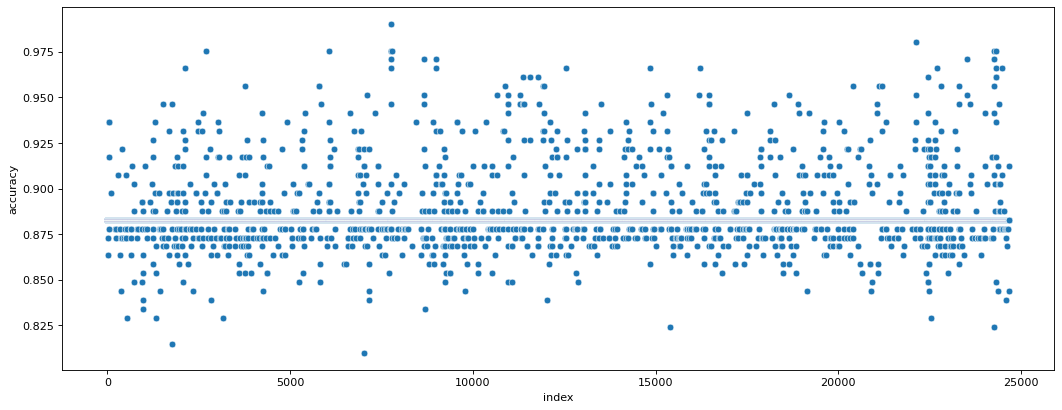

In [206]:
figure(figsize=(16, 6), dpi=80)
sns.scatterplot(data=acc_df, x="index", y="")

In [125]:
import matplotlib.pyplot as plt
importance = pd.Series(xg_simple.feature_importances_)
importance[importance > 0.01]

4172     0.047114
7756     0.186474
8983     0.576320
11788    0.021323
15832    0.010897
16063    0.114064
23057    0.037181
dtype: float32

In [ ]:
figure(figsize=(8, 8), dpi=80)
sns.heatmap(pd.concat([normal_T, tumor_T]).corr, annot=True, cmap='RdYlGn_r', fmt=".2f")